In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./project/Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS', axis=1)
x

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report



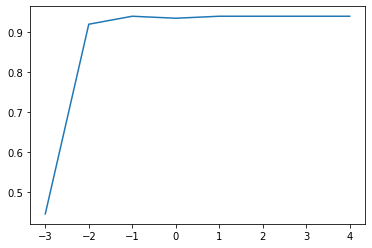

In [6]:
scores = []
c_values = []
for j in [0.001*10**i for i in range(8)]:
    svm = SVC(kernel='linear', C=j)
    svm.fit(x_train, y_train)
    scores.append( svm.score(x_test, y_test) )
    c_values.append(np.log10(j))
plt.plot(c_values, scores)


In [7]:
svm = SVC(kernel='linear', C=0.1)
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.94

In [8]:
report = classification_report(svm.predict(x_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       107
           1       0.96      0.91      0.93        93

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2).fit(x_train, y_train)
predictions = knn.predict(x_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       111
           1       0.92      0.92      0.92        89

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_train_std, x_test_std, y_train, y_test = train_test_split(x_std, y, test_size=0.2)


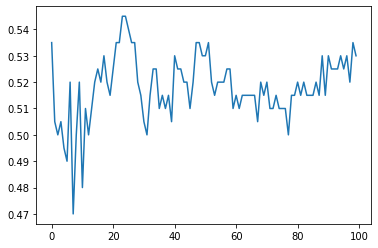

In [14]:
accs = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train_std, y_train)
    acc = knn.score(x_test, y_test)
    accs.append(acc)
plt.plot(range(len(accs)), accs)

In [17]:
knn = KNeighborsClassifier(n_neighbors=10).fit(x_train_std, y_train)
preds = knn.predict(x_test_std)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        99
           1       0.95      0.94      0.95       101

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

